K-Nearest Neighbors -> K En Yakın Komşu Algoritması

In [ ]:
# hem regresyonda hem sınıflandırmada kullanılan bir algoritmadır.
# öklid veya benzeri uzaklık hesabı yapılarak k adet yakın gözlem değeri bulunur.
# regresyon -> en yakın k adet gözlemin y değerlerinin ortalaması alınır.
# sınıflandırma -> en yakın k adet gözlemin y değerlerinin en sık gözlenen frekansı tahmin edilen sınıf olur.

1-> Keşifçi Veri Analizi

In [ ]:
# zaten bu verisetinde önceden yaptığımız için hızlı geçtim.
import pandas as pd
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import cross_validate, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('sample_data/diabetes.csv')
df.head()
df.shape
df.isnull().sum()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


2-> Veri Ön İşleme

In [ ]:
# bağımsız değişkenleri standartlaştırıcaz.
y = df['Outcome']
x = df.drop(['Outcome'],axis=1)
x_scaled = StandardScaler().fit_transform(x)

x = pd.DataFrame(x_scaled, columns=x.columns)
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496
...,...,...,...,...,...,...,...,...
763,1.827813,-0.622642,0.356432,1.722735,0.870031,0.115169,-0.908682,2.532136
764,-0.547919,0.034598,0.046245,0.405445,-0.692891,0.610154,-0.398282,-0.531023
765,0.342981,0.003301,0.149641,0.154533,0.279594,-0.735190,-0.685193,-0.275760
766,-0.844885,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,-0.371101,1.170732


3-> Modelleme

In [ ]:
# knn classifier modelini kuralım.
knn_model = KNeighborsClassifier().fit(x,y)
random_user = x.sample(1, random_state=45)
knn_model.predict(random_user)

array([1])

4-> Model Başarı Değerlendirme

In [ ]:
# yukarıda tek bir işlemde tahminde bulunduk şimdi tüm veriyi tahmin edicez.
y_pred = knn_model.predict(x)
y_prob = knn_model.predict_proba(x)[:,1]
print(classification_report(y,y_pred))
#precision -> 0.79  f1 -> 0.74  accuracy -> 0.83
roc_auc_score(y,y_prob)
cv_results = cross_validate(knn_model,x,y,cv=5,scoring=['roc_auc','f1','accuracy'])
cv_results['test_roc_auc'].mean() # 0.78
cv_results['test_f1'].mean() # 0.59
cv_results['test_accuracy'].mean() # 0.73

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       500
           1       0.79      0.70      0.74       268

    accuracy                           0.83       768
   macro avg       0.82      0.80      0.81       768
weighted avg       0.83      0.83      0.83       768



0.7805279524807827

In [ ]:
# bu skorları nasıl arttırabiliriz ?
# 1 - veri boyutu arttırılabilir.
# 2 - veri ön işleme daha iyi yapılabilir.
# 3 - özellik mühendisliği (bazı sütunlar çıkarılıp yenileri eklenebilir)
# 4 - hiperparametre optimizasyonu yapılabilir.

5-> Hiperparametre Optimizasyonu

In [ ]:
# knn için komşuluk sayısını bulmaya yönelik optiimizasyon yapıcaz.
knn_params = {'n_neighbors': range(2,50)}
knn_gs_best = GridSearchCV(knn_model, knn_params, cv=5, n_jobs=-1, verbose=1).fit(x,y)
# n_jobs -> işlemcilerin arama sırasındaki performansları -1 en yüksek performans
# verbose -> denemelerden sonra rapor bekleyip beklememe sorusu 1 evet bekliyorum demek

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
knn_gs_best.best_params_
# varsayılan 5 komşuydu en iyi komşu sayısı 17 çıktı

{'n_neighbors': 17}

6-> Final Model

In [ ]:
# yeni komşu sayısıyla final modelimizi kurucaz.
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(x,y)
# ** amacı bütün parametreleri fonksiyonun anlayacağı tarzda sözlük olarak atamak

cv_results = cross_validate(knn_model,x,y,cv=5,scoring=['roc_auc','f1','accuracy'])
cv_results['test_roc_auc'].mean() # 0.81
cv_results['test_f1'].mean() # 0.61
cv_results['test_accuracy'].mean() # 0.76

0.8127938504542278

CART -> Classification & Regression Tree

In [ ]:
# karmaşık veri setlerini basit karar yapılarına dönüştürür.
# heterojen veri setleri belirlenmiş hedef değişkene göre homojen alt gruplara ayrılır.

In [4]:
!pip install skompiler

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54310 sha256=ac1e374d3dc2b01f7dcf9272143b4e42076741c07eded3096eb37b64c4b2b044
  Stored in directory: /root/.cache/pip/wheels/14/72/77/016a3480b154c1c2f70dcb355af1a01ef832974079ec6148e6
Successfully built skompiler


Kütüphane Kurulumları

In [6]:
import warnings
import joblib
import astor
import pydotplus
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skompiler import skompile
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve
from sklearn.tree import DecisionTreeClassifier, export_text, export_graphviz

Modelleme

In [11]:
# model kurulumu
df = pd.read_csv('sample_data/diabetes.csv')
y = df['Outcome']
x = df.drop(['Outcome'], axis=1)
cart_model = DecisionTreeClassifier(random_state=1).fit(x,y)

In [13]:
# tahminlere bakalım
y_pred = cart_model.predict(x)
y_prob = cart_model.predict_proba(x)[:,1]
print(classification_report(y,y_pred))
roc_auc_score(y,y_prob)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



1.0

In [17]:
# holdout yöntemi
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.30,random_state=17)
cart_model = DecisionTreeClassifier(random_state=17).fit(x_train,y_train)
# train başarısı
y_pred = cart_model.predict(x_train)
y_prob = cart_model.predict_proba(x_train)[:,1]
print(classification_report(y_train,y_pred)) # 1.0
roc_auc_score(y_train,y_prob) # 1.0

# test başarısı
y_pred = cart_model.predict(x_test)
y_prob = cart_model.predict_proba(x_test)[:,1]
print(classification_report(y_test,y_pred)) # acc -> 0.71  f1 -> 0.57
roc_auc_score(y_test,y_prob) # 0.67

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       350
           1       1.00      1.00      1.00       187

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537

              precision    recall  f1-score   support

           0       0.77      0.78      0.77       150
           1       0.58      0.57      0.57        81

    accuracy                           0.71       231
   macro avg       0.68      0.67      0.67       231
weighted avg       0.70      0.71      0.70       231



0.6739506172839506

In [20]:
# cross validate yöntemi
cart_model = DecisionTreeClassifier(random_state=17).fit(x,y)
cv_results = cross_validate(cart_model,x,y,cv=5,scoring=['accuracy','f1','roc_auc'])
cv_results['test_accuracy'].mean() # 0.70
cv_results['test_f1'].mean() # 0.57
cv_results['test_roc_auc'].mean() # 0.67

0.5710621194523633

Hiperparametre Optimizasyonu

In [23]:
# hiperparametre optimizasyonu
cart_params = {'max_depth':range(1,11),
               "min_samples_split":range(2,20)}
cart_best_grid = GridSearchCV(cart_model, cart_params, cv=5, n_jobs=-1, verbose=True).fit(x,y)
cart_best_grid.best_params_
cart_best_grid.best_score_  # varsayılan acc -> 0.75

Fitting 5 folds for each of 180 candidates, totalling 900 fits


0.7500806383159324

Final Modeli

In [27]:
# final modeli
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_, random_state=17).fit(x,y)

cart_final2 = cart_model.set_params(**cart_best_grid.best_params_).fit(x,y) # böyle de kurulabilir

cv_results = cross_validate(cart_final,x,y,cv=5,scoring=['accuracy','f1','roc_auc'])
cv_results['test_accuracy'].mean() # 0.75
cv_results['test_f1'].mean() # 0.61
cv_results['test_roc_auc'].mean() # 0.79

0.797796645702306

Özellik Önemi

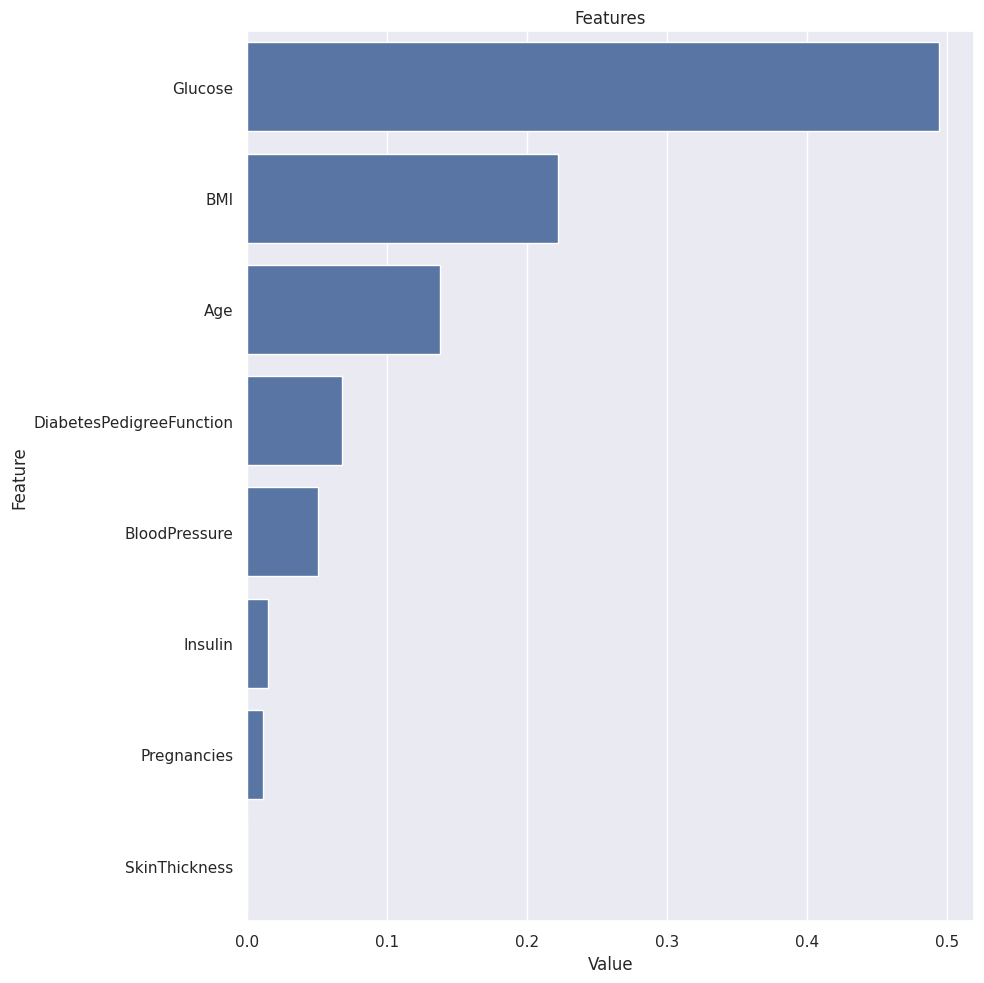

In [28]:
# özellik önemi
def plot_importance(model, features, num=len(x), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x='Value', y='Feature', data=feature_imp.sort_values(by='Value', ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importance.png')

plot_importance(cart_final, x)

Öğrenme Eğrileriyle Model Karmaşıklığını Analiz Etme

In [32]:
train_score, test_score = validation_curve(cart_final, x, y,
                                           param_name='max_depth',
                                           param_range=range(1,11),
                                           scoring='roc_auc',
                                           cv=10)
mean_train_score = np.mean(train_score, axis=1)
mean_test_score = np.mean(test_score, axis=1)

Görselleştirme

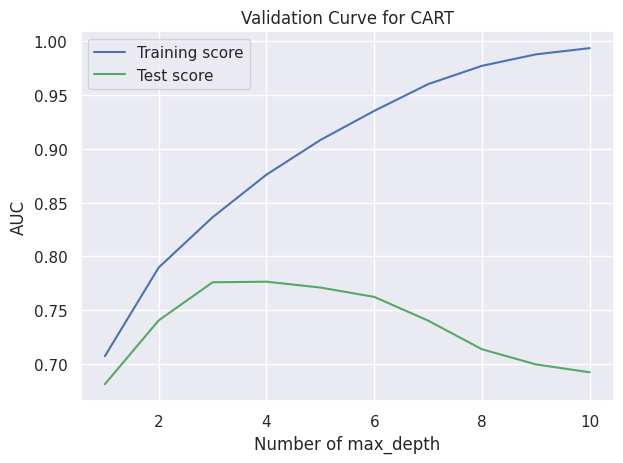

In [33]:
# görselleştirelim
plt.plot(range(1,11), mean_train_score, label='Training score',color='b')
plt.plot(range(1,11), mean_test_score, label='Test score',color='g')
plt.title('Validation Curve for CART')
plt.xlabel('Number of max_depth')
plt.ylabel('AUC')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

In [34]:
# dinamik görselleştirme
def val_curve_params(model, x, y, param_name, param_range, scoring='roc_auc', cv=10):
    train_score, test_score = validation_curve(model, x, y,
                                               param_name=param_name,
                                               param_range=param_range,
                                               scoring=scoring,
                                               cv=cv)
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)
    plt.plot(param_range, mean_train_score, label='Training score',color='b')
    plt.plot(param_range, mean_test_score, label='Test score',color='g')
    plt.title(f'Validation Curve for {type(model).__name__}')
    plt.xlabel(f'Number of {param_name}')
    plt.ylabel(f'{scoring}')
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

val_curve_params(cart_final, x, y, 'max_depth', range(1,11))

Karar Ağaçlarını Görselleştirme

In [35]:
def tree_graphs(model, col_names, file_name):
  tree_str = export_graphviz(model, feature_names=col_names, filled=True, out_file=None)
  graph = pydotplus.graph_from_dot_data(tree_str)
  graph.write_png(file_name)

tree_graphs(cart_final, x.columns, 'tree.png')

Karar Kuralları

In [37]:
tree_rules = export_text(cart_final, feature_names=list(x.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  

Kuralları Python Koduyla Yazma

In [38]:
print(skompile(cart_final.predict).to('python/code'))

(((((0 if x[0] <= 7.5 else 1) if x[5] <= 30.949999809265137 else 0 if x[6] <=
    0.5005000084638596 else 0) if x[5] <= 45.39999961853027 else 1 if x[2] <=
    99.0 else 0) if x[7] <= 28.5 else (1 if x[5] <= 9.649999618530273 else 
    0) if x[5] <= 26.350000381469727 else (1 if x[1] <= 28.5 else 0) if x[1
    ] <= 99.5 else 0 if x[6] <= 0.5609999895095825 else 1) if x[1] <= 127.5
     else (((0 if x[5] <= 28.149999618530273 else 1) if x[4] <= 132.5 else 
    0) if x[1] <= 145.5 else 0 if x[7] <= 25.5 else 1 if x[7] <= 61.0 else 
    0) if x[5] <= 29.949999809265137 else ((1 if x[2] <= 61.0 else 0) if x[
    7] <= 30.5 else 1 if x[6] <= 0.4294999986886978 else 1) if x[1] <= 
    157.5 else (1 if x[6] <= 0.3004999905824661 else 1) if x[4] <= 629.5 else 0
    )



Model Kaydetme ve Geri Çağırma

In [41]:
joblib.dump(cart_final, 'model.pkl')
final_model = joblib.load('model.pkl')
x = [27,42,7,21,8,55,43,2]
final_model.predict(pd.DataFrame(x).T)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])